In [6]:
# diamondsbig dataset seems to have disappeared while I was working.
# see part 2 for workaround

library(ggplot2)
library(tidyr)
library(GGally)
library(dplyr)

In [13]:
# file is already in ggplot2. seems to be called diamondsbig
# str(diamondsbig)


qplot(x = price, data = diamondsbig, binwidth = 10) +
    scale_x_continuous(limits = c(300, 1000), breaks = seq(300, 1000, 100)) +
    facet_wrap(~cut)

# this creates a histogram of the prices
# note the parameters for the x-values in scale_x_continuous
# then the histogram is split (faceted) by the cut of the diamond (good, v.good, or ideal)

ERROR: Error: `data` must be uniquely named but does not have names


In [14]:
# another histogram of the same data but this time facted by color
qplot(x = price, data = diamondsbig, binwidth = 10) +
    scale_x_continuous(limits = c(300, 1000), breaks = seq(300, 1000, 50)) + 
    facet_wrap(~color)

ERROR: Error: `data` must be uniquely named but does not have names


In [52]:
summary(diamondsbig)

     carat           cut             color          clarity      
 Min.   :0.200   Good  : 59680   G      :96204   SI1    :116631  
 1st Qu.:0.500   V.Good:168896   F      :93573   VS2    :111082  
 Median :0.900   Ideal :369448   E      :93483   SI2    :104300  
 Mean   :1.071                   H      :86619   VS1    : 97730  
 3rd Qu.:1.500                   D      :73630   VVS2   : 65500  
 Max.   :9.250                   I      :70282   VVS1   : 54798  
                                 (Other):84233   (Other): 47983  
     table           depth               cert        measurements      
 Min.   : 0.00   Min.   : 0.00   GIA       :463555   Length:598024     
 1st Qu.:56.00   1st Qu.:61.00   IGI       : 43667   Class :character  
 Median :58.00   Median :62.10   EGL       : 33814   Mode  :character  
 Mean   :57.63   Mean   :61.06   EGL USA   : 16079                     
 3rd Qu.:59.00   3rd Qu.:62.70   EGL Intl. : 11447                     
 Max.   :75.90   Max.   :81.30   EGL ISR

In [64]:
# now counting numbers of diamonds below/above certain prices
a1 <- nrow(diamondsbig[diamondsbig$price < 500,])
a1
a2 <- nrow(diamondsbig[diamondsbig$price < 250,])
a2
a3 <- nrow(diamondsbig[diamondsbig$price >= 15000,])
a3

# could similarly look at numbers by color
a4 <- nrow(diamondsbig[diamondsbig$color == 'I', ])
a4

# note that summarize was in dplyr library
group_by_colors <- diamondsbig %>%
    group_by(color) %>%
    summarize(count = n())
group_by_colors

[1] 10764

[1] 713

[1] 113627

[1] 70282

color,count
<fct>,<int>
L,9656
K,25868
J,48709
I,70282
H,86619
G,96204
F,93573
E,93483
D,73630


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 713 rows containing non-finite values (stat_bin)."


'data.frame':	598024 obs. of  12 variables:
 $ carat       : num  0.25 0.23 0.34 0.21 0.31 0.2 0.2 0.22 0.23 0.2 ...
 $ cut         : Factor w/ 3 levels "Good","V.Good",..: 2 1 1 2 2 1 1 2 2 1 ...
 $ color       : Factor w/ 9 levels "L","K","J","I",..: 2 6 3 9 2 6 6 9 2 7 ...
 $ clarity     : Factor w/ 10 levels "I3","I2","I1",..: 3 3 2 3 3 4 4 3 4 5 ...
 $ table       : num  59 61 58 60 59 60 63 61 57.5 65 ...
 $ depth       : num  63.7 58.1 58.7 60.6 62.2 64.4 62.6 59.2 63.6 54.9 ...
 $ cert        : Factor w/ 9 levels "GIA","IGI","EGL",..: 1 1 1 1 3 1 1 1 2 1 ...
 $ measurements: chr  "3.96 x 3.95 x 2.52" "4.00 x 4.05 x 2.30" "4.56 x 4.53 x 2.67" "3.80 x 3.82 x 2.31" ...
 $ price       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x           : num  3.96 4 4.56 3.8 4.35 3.74 3.72 3.95 3.87 3.83 ...
 $ y           : num  3.95 4.05 4.53 3.82 4.26 3.67 3.65 3.97 3.9 4 ...
 $ z           : num  2.52 2.3 2.67 2.31 2.68 2.38 2.31 2.34 2.47 2.14 ...


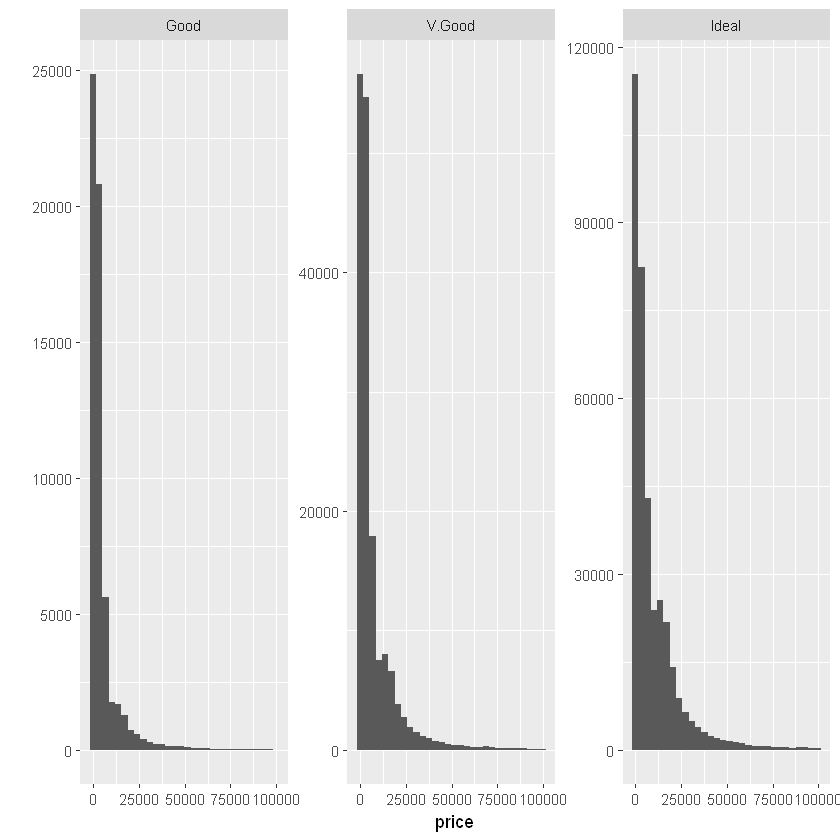

In [65]:
# another histogram of prices, faceted by cut, but with a different scale

qplot(x = price, data = diamondsbig) +
    facet_wrap(~cut, scales = "free_y")

str(diamondsbig)

Warning message:
"Removed 713 rows containing non-finite values (stat_bin)."


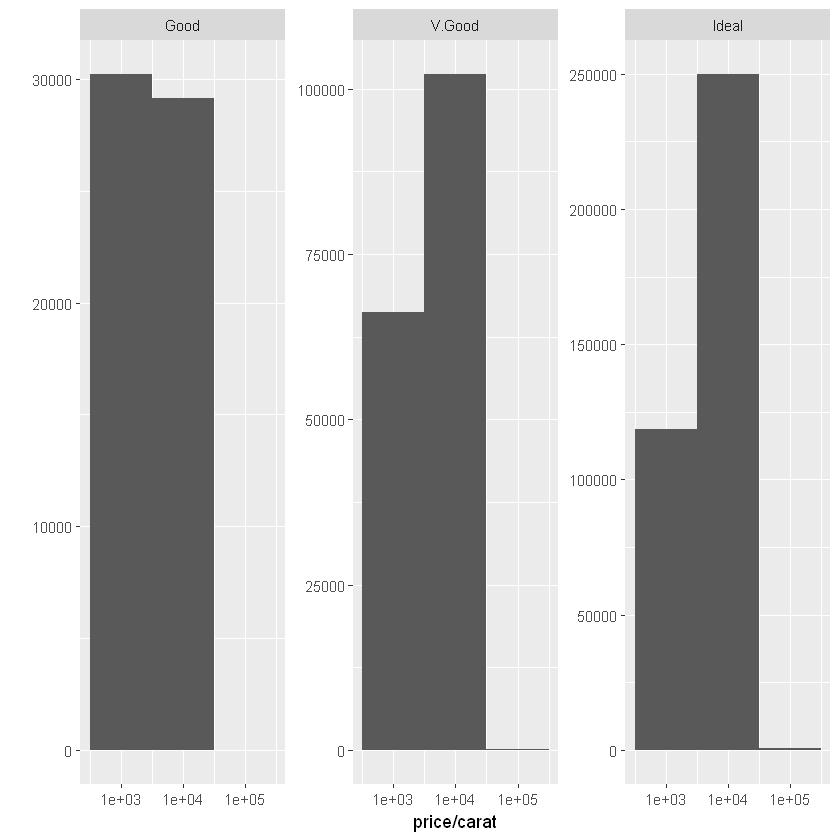

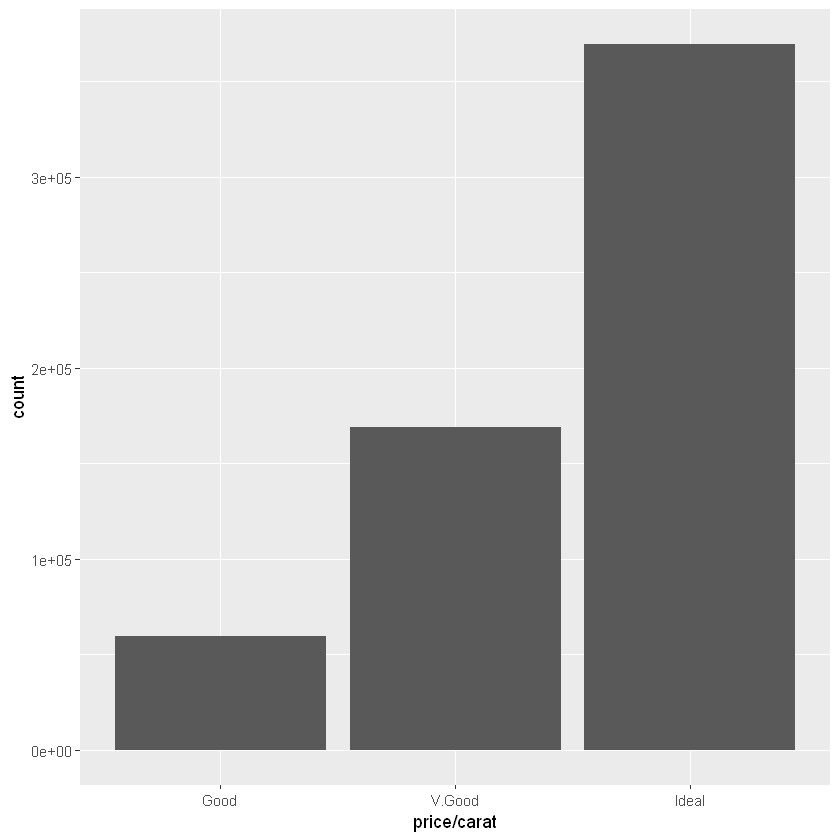

In [83]:
# another histogram of prices per carat
qplot(x = price/carat, data = diamondsbig, binwidth = 1) +
    scale_x_log10()+
    facet_wrap(~cut, scales = "free_y")

# going to attempt to replicate with ggplot

hist1 <- ggplot(diamondsbig, aes(x = price / carat)) +
    geom_bar(aes(cut))

hist1
# that's as good as it got

Warning message:
"Removed 713 rows containing non-finite values (stat_bin)."


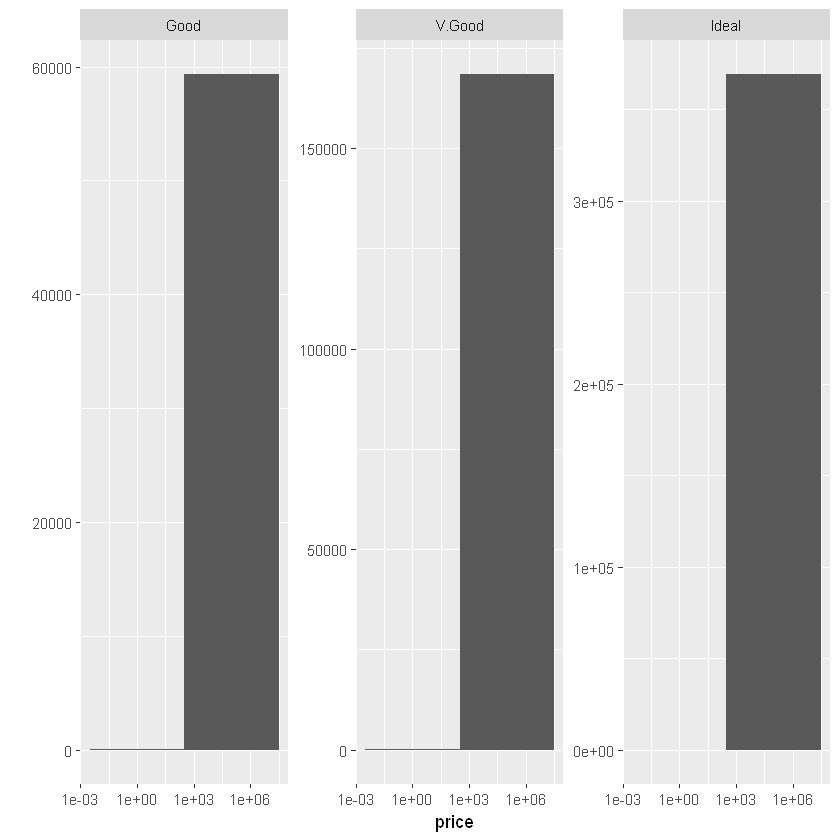

In [96]:
# another histogram
qplot(x = price, data = diamondsbig, binwidth = 5) +
    scale_x_log10()+#limits = c(0, 1000), breaks = seq(0, 1000, 50)) +
    facet_wrap(~cut, scales = "free_y")

# seems to be some mistake in the commented out part

Warning message:
"Removed 246487 rows containing non-finite values (stat_boxplot)."


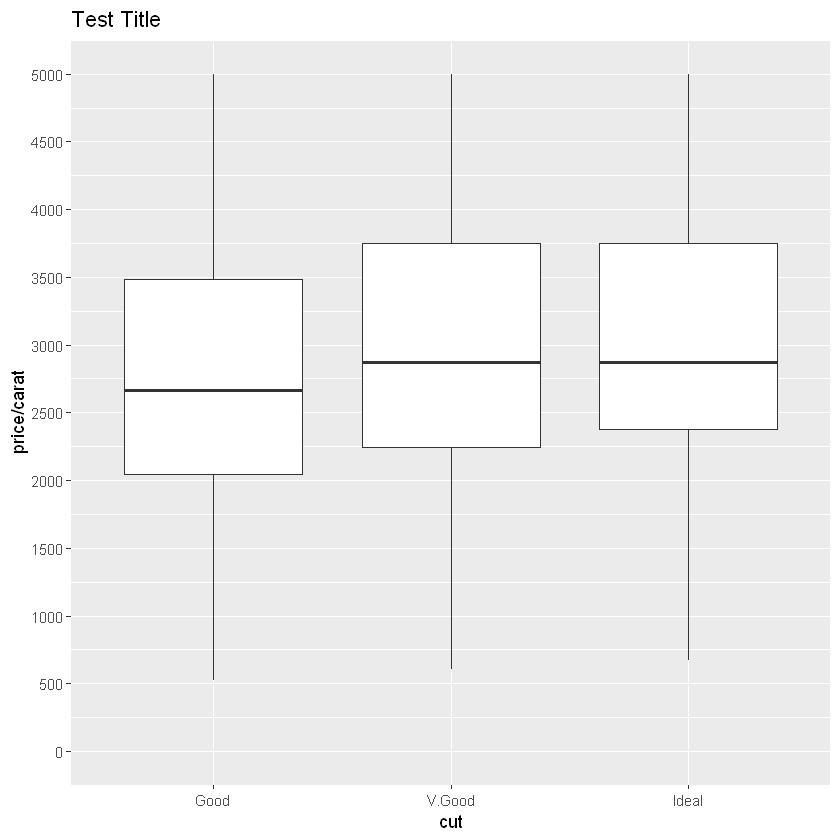

In [98]:
# boxplots! this one is of price per carat vs diamond cut
qplot(y = price/carat, x = cut, data = diamondsbig, geom = "boxplot") +
    scale_y_continuous(limits = c(0, 5000), breaks = seq(0, 5000, 500)) +
    labs(title = "Test Title")

Warning message:
"Removed 247773 rows containing non-finite values (stat_boxplot)."


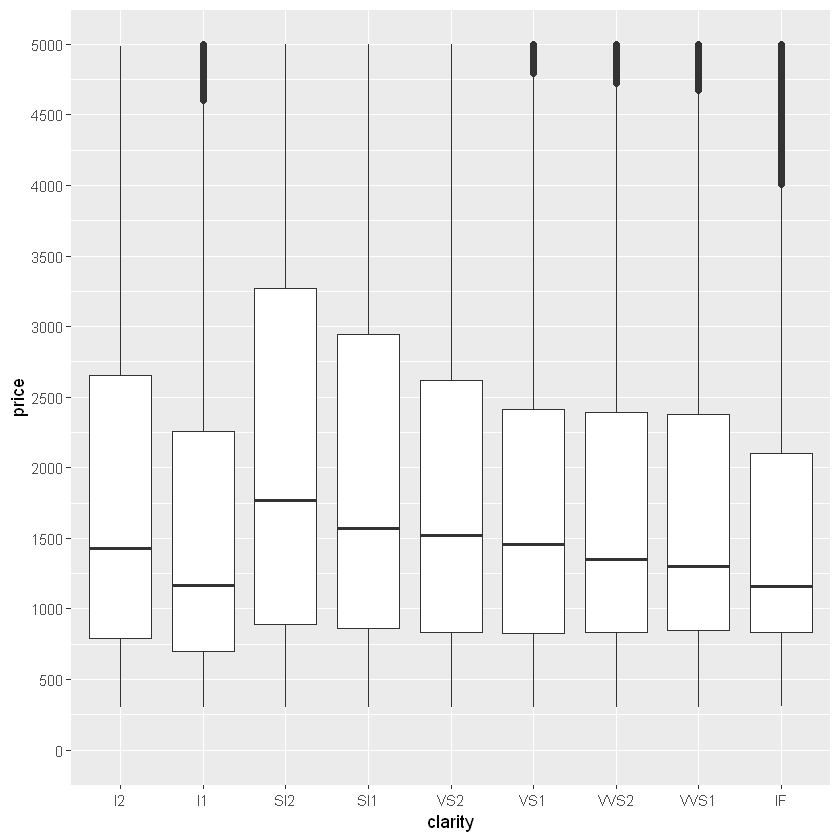

In [103]:
# another boxplot price vs clarity
qplot(y = price, x = clarity, data = diamondsbig, geom = "boxplot") +
    scale_y_continuous(limits = c(0, 5000), breaks = seq(0, 5000, 500))

Warning message:
"Removed 247773 rows containing non-finite values (stat_boxplot)."


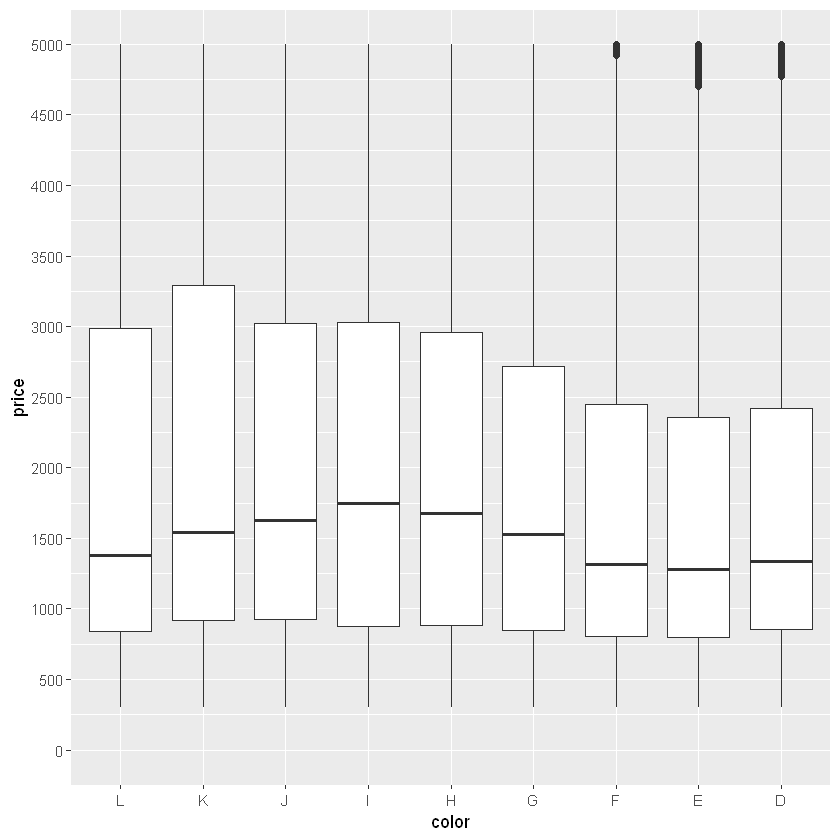

In [105]:
# one more boxplot of price vs color
qplot(y = price, x = color, data = diamondsbig, geom = "boxplot") +
    scale_y_continuous(limits = c(0, 5000), breaks = seq(0, 5000, 500))


In [112]:
# find the interquartile range of subsets of the data
IQR(subset(diamondsbig, price < 1000)$price)
IQR(subset(diamondsbig, color == "D")$price, na.rm = TRUE)
IQR(subset(diamondsbig, color == "J")$price, na.rm = TRUE)

summary(subset(diamondsbig, color == "D")$price)
summary(subset(diamondsbig, color == "J")$price)

[1] 238

[1] 9563.5

[1] 9777

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    301    1050    2690    8266   10614   99920      67 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    300    1575    4697    9424   11352   99806      64 